In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import factorial,sqrt,pi
np.random.seed(42)

In [8]:
import numpy as np
p = 0.3
n_samples = 10000
bern = np.random.binomial(1,p,size = n_samples)
print("Bernoulli sample mean (approx p):",bern.mean())
print("Bernoulli sample var (approx p):",bern.var())

Bernoulli sample mean (approx p): 0.2887
Bernoulli sample var (approx p): 0.20535231000000004


In [9]:
#Normal Continuous sample
mu,sigma = 2.0,1.5
norm_samples = np.random.normal(mu,sigma,size=n_samples)
print("Normal sample mean (approx mu):",norm_samples.mean())
print("Normal sample var (approx mu):",norm_samples.var())

Normal sample mean (approx mu): 2.0185330937808708
Normal sample var (approx mu): 2.2487603282724753


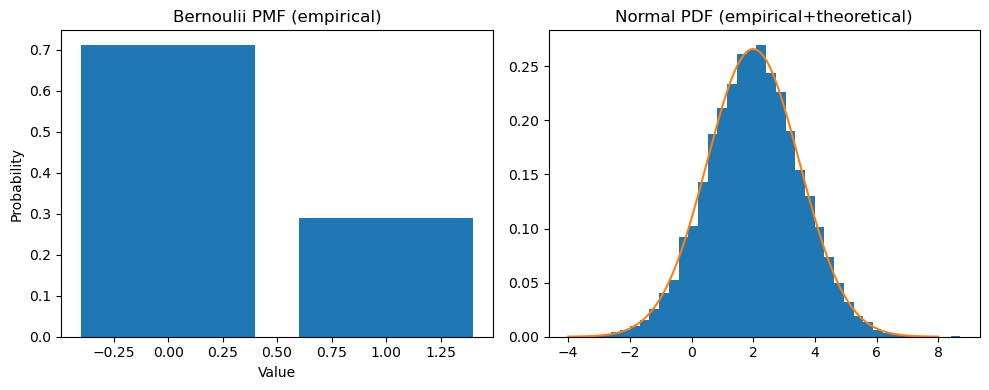

In [11]:
#Plot PDFs/PMFs
fig,axes = plt.subplots(1,2,figsize=(10,4))
#Vernoulii PMF
vals, counts = np.unique(bern, return_counts=True)
axes[0].bar(vals,counts/len(bern))
axes[0].set_title("Bernoulii PMF (empirical)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Probability")
axes[1].hist(norm_samples, bins=40, density=True)
x=np.linspace(mu-4*sigma,mu+4*sigma,200)
axes[1].plot(x, stats.norm.pdf(x,mu,sigma))
axes[1].set_title("Normal PDF (empirical+theoretical)")
plt.tight_layout()
plt.show()